The main issue with the policy gradient is that it has a rather high varinace and hence has a slow convergence rate taking often many iterations. It is also difficult to select hyperparameters in the optimization process such as the learning rate, for particular optimization algorthims it is certainly easier, for example in the Berkley notes Levin mentions that Adam's step size is not bad.

In [23]:
import gym
import numpy as np
env=gym.make("CartPole-v0")

class PolicyPole:
    
    def __init__(self,theta,alpha,gamma):
        
     # initalize the constructor for the policy pole class 
        self.theta=theta
        self.alpha=alpha
        self.gamma=gamma
        # define the sigmoid activation fucntiom for our prob dist
    def sigmoid(self,y):
        return 1/(1+np.exp(-y))
    #prob of two actions
    def prob(self,x):
        # prob_0 is the model pi_0 like a logisitc regression model where theta is the parameter
        # and x is the data input in this action it is action array from the gym virtual env
        #trivially it is p, and 1-p by laws of prob
        y=x@self.theta
        prob0=self.sigmoid(y)
        return np.array([prob0,1-prob0])
    # sample action from our dist
    def act(self,x):
        # we sample from our logisitc regression function
        probs=self.prob(x)
        action=np.random.choice([0,1],p=probs)
        
        return action, probs[action]
     # using the properties of sigmooid we define the gradient
    def grad_log(self,x):
        y=x@self.theta 
        grad_p0=x-x*self.sigmoid(y)
        grad_p1=-x*self.sigmoid(y)
        
        return grad_p0,grad_p1
    # gradient dotted with reward of action in a single episode 
    def grad_log_dot_reward(self,grad_log,actions,discounted_rewards):
        return grad_log.T@discounted_rewards
    
    def discount_rewards(self,rewards):
        
        discounted_rewards=np.zeros(len(rewards))
        
        cum_rewards=0
        for i in reversed(range(0,len(rewards))):
            cum_rewards=rewards[i]+cum_rewards*self.gamma
            discounted_rewards[i]=cum_rewards
        return discounted_rewards
    ## now  we optimize policy over trajectories and maintain the dimension of the gradient
    ## via the asset command
    
    
    def optimize(self,rewards,obs,actions):
        
        # gradient over all trajectories within ep
        grad_log=np.array([self.grad_log(ob)[action] for ob,action in zip(obs,actions)])
        #maintain dim for our dot produt 
        grad_log=grad_log.reshape(len(obs),len(self.theta))
        
        #print(grad_log)
        
        
        #initalize discounted rewards as it is input for our dot ptoduct 
        discounted_rewards=self.discount_rewards(rewards)
        # dot product 
        dot=self.grad_log_dot_reward(grad_log,actions,discounted_rewards)
        #gradient descent 
        self.theta+=self.alpha*dot

In [24]:
def next_episode(env,policy,render=False):
    observation=env.reset()
    totalre=0
    
    obser=[]
    actions=[]
    rewards=[]
    probs=[]
    done=False
    
    
    while not done:
        if render:
            env.render()
            
        obser.append(observation)
        
        action, prob= policy.act(observation)
        observation,reward, done, info= env.step(action)
        
        totalre+=reward
        rewards.append(reward)
        actions.append(action)
        probs.append(prob)
        
    return totalre, np.array(rewards),np.array(obser),np.array(actions),np.array(probs)

In [35]:
def train(theta,alpha,gamma,Policy,cross_validate,MAX_EP=1000,seed=None,evaluate=False):
    
    env=gym.make("CartPole-v1")
    if seed is not None:
        env.seed(seed)
    ep_rewards=[]
    policy=Policy(theta, alpha, gamma)
    
    
    for w in range(MAX_EP):
        
        total_reward, rewards, obser, actions, probs= next_episode(env,policy)
        
        
        policy.optimize(rewards,obser,actions)
        print("Episode{} total reward:{} ".format( w, str(total_reward)))
    if evaluate:
        env = Monitor(env, 'pg_cartpole/', video_callable=False, force=True)
        for _ in range(cross_validate):
            next_episode(env, policy, render=False)
        env.env.close()
        
    return policy
        

In [36]:
from gym.wrappers.monitor import Monitor, load_results
GLOBAL_SEED = 0
np.random.seed(GLOBAL_SEED)
cross_validate=200
policy = train(theta=np.random.rand(4),
                                alpha=0.002,
                                gamma=0.99,
                                Policy=PolicyPole,
                                cross_validate=cross_validate,
                                MAX_EP=1000,
                                seed=GLOBAL_SEED,
                                evaluate=True)




Episode0 total reward:20.0 
Episode1 total reward:29.0 
Episode2 total reward:12.0 
Episode3 total reward:19.0 
Episode4 total reward:20.0 
Episode5 total reward:17.0 
Episode6 total reward:41.0 
Episode7 total reward:14.0 
Episode8 total reward:20.0 
Episode9 total reward:10.0 
Episode10 total reward:14.0 
Episode11 total reward:41.0 
Episode12 total reward:21.0 
Episode13 total reward:29.0 
Episode14 total reward:12.0 
Episode15 total reward:18.0 
Episode16 total reward:16.0 
Episode17 total reward:28.0 
Episode18 total reward:24.0 
Episode19 total reward:9.0 
Episode20 total reward:23.0 
Episode21 total reward:21.0 
Episode22 total reward:42.0 
Episode23 total reward:20.0 
Episode24 total reward:14.0 
Episode25 total reward:13.0 
Episode26 total reward:32.0 
Episode27 total reward:27.0 
Episode28 total reward:30.0 
Episode29 total reward:42.0 
Episode30 total reward:28.0 
Episode31 total reward:35.0 
Episode32 total reward:28.0 
Episode33 total reward:36.0 
Episode34 total reward:64

Episode279 total reward:322.0 
Episode280 total reward:207.0 
Episode281 total reward:116.0 
Episode282 total reward:352.0 
Episode283 total reward:57.0 
Episode284 total reward:500.0 
Episode285 total reward:55.0 
Episode286 total reward:295.0 
Episode287 total reward:69.0 
Episode288 total reward:232.0 
Episode289 total reward:120.0 
Episode290 total reward:219.0 
Episode291 total reward:364.0 
Episode292 total reward:210.0 
Episode293 total reward:225.0 
Episode294 total reward:121.0 
Episode295 total reward:176.0 
Episode296 total reward:154.0 
Episode297 total reward:152.0 
Episode298 total reward:185.0 
Episode299 total reward:224.0 
Episode300 total reward:188.0 
Episode301 total reward:259.0 
Episode302 total reward:207.0 
Episode303 total reward:272.0 
Episode304 total reward:218.0 
Episode305 total reward:341.0 
Episode306 total reward:265.0 
Episode307 total reward:159.0 
Episode308 total reward:492.0 
Episode309 total reward:500.0 
Episode310 total reward:141.0 
Episode311 

Episode545 total reward:144.0 
Episode546 total reward:176.0 
Episode547 total reward:262.0 
Episode548 total reward:292.0 
Episode549 total reward:147.0 
Episode550 total reward:198.0 
Episode551 total reward:132.0 
Episode552 total reward:138.0 
Episode553 total reward:263.0 
Episode554 total reward:255.0 
Episode555 total reward:157.0 
Episode556 total reward:275.0 
Episode557 total reward:212.0 
Episode558 total reward:195.0 
Episode559 total reward:282.0 
Episode560 total reward:201.0 
Episode561 total reward:167.0 
Episode562 total reward:371.0 
Episode563 total reward:264.0 
Episode564 total reward:235.0 
Episode565 total reward:143.0 
Episode566 total reward:268.0 
Episode567 total reward:164.0 
Episode568 total reward:291.0 
Episode569 total reward:348.0 
Episode570 total reward:340.0 
Episode571 total reward:234.0 
Episode572 total reward:233.0 
Episode573 total reward:167.0 
Episode574 total reward:181.0 
Episode575 total reward:112.0 
Episode576 total reward:165.0 
Episode5

Episode810 total reward:200.0 
Episode811 total reward:208.0 
Episode812 total reward:190.0 
Episode813 total reward:393.0 
Episode814 total reward:329.0 
Episode815 total reward:255.0 
Episode816 total reward:442.0 
Episode817 total reward:242.0 
Episode818 total reward:370.0 
Episode819 total reward:500.0 
Episode820 total reward:500.0 
Episode821 total reward:500.0 
Episode822 total reward:500.0 
Episode823 total reward:500.0 
Episode824 total reward:500.0 
Episode825 total reward:500.0 
Episode826 total reward:500.0 
Episode827 total reward:500.0 
Episode828 total reward:500.0 
Episode829 total reward:500.0 
Episode830 total reward:500.0 
Episode831 total reward:500.0 
Episode832 total reward:500.0 
Episode833 total reward:500.0 
Episode834 total reward:500.0 
Episode835 total reward:500.0 
Episode836 total reward:500.0 
Episode837 total reward:500.0 
Episode838 total reward:500.0 
Episode839 total reward:500.0 
Episode840 total reward:500.0 
Episode841 total reward:500.0 
Episode8

In [38]:
state=env.reset()

In [ ]:
while True:
    
    action, prob = policy.act(state)
    state, reward, done, info = env.step(action)
    env.render()
    
    env.close
    

/opt/anaconda3/lib/python3.7/site-packages/gym/envs/classic_control/cartpole.py:151: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  "You are calling 'step()' even though this "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


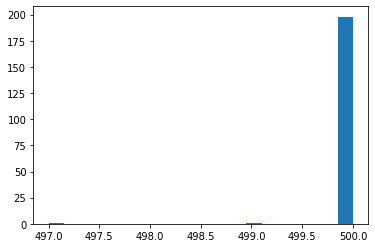

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
results = load_results('pg_cartpole')
plt.hist(results['episode_rewards'], bins=20);